In [1]:
# TEMP: Import lagom
# Not useful once lagom is installed
import sys
sys.path.append('/home/zuo/Code/lagom/')

In [2]:
def solve(es_optimizer, max_iter, log_interval=1):
    """
    Solve
    
    Args:
        es_optimizer (ESOptimizer): ES optimizer
        max_iter (int): maximum number of iterations (generations)
        log_interval (int): log interval
    """
    list_best_f_val = []
    
    for i in range(max_iter):
        # Perform one iteration
        results = es_optimizer.step()
        
        # Logging
        best_f_val = results['best_f_val']
        list_best_f_val.append(best_f_val)
        if i == 0 or (i+1)%log_interval == 0:
            print(f'Objective function value at iteration #{i+1}: {best_f_val}')
    
    # Final logging
    best_param = results['best_param']
    print(f'# Local optimum discovered by ES solver: {best_param}')
    print(f'# Its objective function value: {best_f_val}')
    
    return list_best_f_val

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from lagom.core.es.test_functions import Rastrigin
from lagom.core.es.test_functions import Sphere
from lagom.core.es.test_functions import StyblinskiTang
from lagom.core.es.test_functions import HolderTable


def plot_contour(f, num_points=100):
    x = np.linspace(*f.search_domain, num=num_points)
    y = np.linspace(*f.search_domain, num=num_points)
    x, y = np.meshgrid(x, y)
    
    # Compute function values
    z = f([x, y])
    
    fig, ax = plt.subplots(1, 1)
    ax.contourf(x, y, z, cmap='jet')
    
    return fig

plot_contour(Rastrigin())

<Figure size 640x480 with 1 Axes>

In [4]:
import numpy as np

from lagom.core.es import ESOptimizer
from lagom.core.es import CMAES, OpenAIES

from time import time


t = time()

# Seeding
seed = 0
np.random.seed(seed)

all_es = {}
all_best_f_val = {}

# Create and record all ES algorithms
cmaes = CMAES(mu0=[3]*100, 
              std0=0.5, 
              popsize=12)
all_es['CMAES'] = cmaes

openaies = OpenAIES(mu0=[3]*100, 
                    std0=0.5, 
                    popsize=50, 
                    std_decay=0.999,
                    min_std=0.01, 
                    lr=1e-1, 
                    lr_decay=1.0, 
                    min_lr=1e-1, 
                    antithetic=False, 
                    rank_transform=False)
all_es['OpenAI ES'] = openaies

openaies = OpenAIES(mu0=[3]*100, 
                    std0=0.5, 
                    popsize=50, 
                    std_decay=0.999,
                    min_std=0.01, 
                    lr=1e-1, 
                    lr_decay=1.0, 
                    min_lr=1e-1, 
                    antithetic=True, 
                    rank_transform=False)
all_es['OpenAI ES with antithetic'] = openaies

openaies = OpenAIES(mu0=[3]*100, 
                    std0=0.5, 
                    popsize=50, 
                    std_decay=0.999,
                    min_std=0.01, 
                    lr=1e-1, 
                    lr_decay=1.0, 
                    min_lr=1e-1, 
                    antithetic=False, 
                    rank_transform=True)
all_es['OpenAI ES with rank'] = openaies

openaies = OpenAIES(mu0=[3]*100, 
                    std0=0.5, 
                    popsize=50, 
                    std_decay=0.999,
                    min_std=0.01, 
                    lr=1e-1, 
                    lr_decay=1.0, 
                    min_lr=1e-1, 
                    antithetic=True, 
                    rank_transform=True)
all_es['OpenAI ES with antithetic and rank'] = openaies


for name, es in all_es.items():
    print('#'*50)
    print(f'ES: {name}')
    print('#'*50)
    
    es_optimizer = ESOptimizer(es, Rastrigin())

    list_best_f_val = solve(es_optimizer=es_optimizer, 
                            max_iter=1000, 
                            log_interval=100)
    
    all_best_f_val[name] = list_best_f_val

print(f'Total time: {time() - t:.3} s')

(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 100 (seed=256477, Mon Jul  9 18:04:09 2018)
##################################################
ES: CMAES
##################################################
Objective function value at iteration #1: 1760.2223056672815
Objective function value at iteration #100: 1406.1531667864274
Objective function value at iteration #200: 1273.2587132400793
Objective function value at iteration #300: 1273.2587132400793
Objective function value at iteration #400: 990.969610378911


KeyboardInterrupt: 

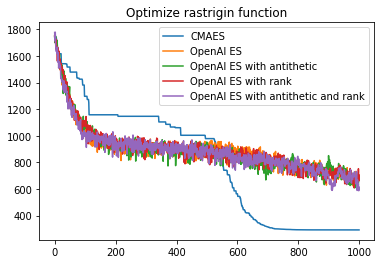

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1)

for name, best_f_val in all_best_f_val.items():
    ax.plot(best_f_val, label=f'{name}')

ax.set_title('Optimize rastrigin function')
ax.legend()

# Parallelized ES

In [9]:
cmaes = CMAES(mu0=[3]*100, 
                      std0=0.5, 
                      popsize=12)

f = Rastrigin()

from lagom.core.es import ESOptimizer

es = ESOptimizer(cmaes, f)

for i in range(1000):
    results = es.step()
    
    if i == 0 or (i+1)%100 == 0:
        print(f'Generate: {i}, {results["best_f_val"]}')

(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 100 (seed=252581, Mon Jul  9 18:13:30 2018)
Generate: 0, 1808.2580332062641
Generate: 99, 1436.5389019149547
Generate: 199, 1203.4954271486192
Generate: 299, 1179.6723506640815
Generate: 399, 1179.6723506640815
Generate: 499, 1138.6262190475597
Generate: 599, 1044.7498504610496
Generate: 699, 811.8190056128891
Generate: 799, 404.7292124962544
Generate: 899, 373.31374329800116
Generate: 999, 370.30155938543606


In [1]:
# TEMP: Import lagom
# Not useful once lagom is installed
import sys
sys.path.append('/home/zuo/Code/lagom/')

import numpy as np

import cma

from lagom.core.es import CMAES
from lagom.core.es.test_functions import Rastrigin

np.random.seed(0)


rastrigin = Rastrigin()

es = CMAES(mu0=[3]*100, std0=0.5, popsize=12)


for i in range(1000):
    x = es.ask()
    c = [rastrigin(a) for a in x]
    
    es.tell(x, c)
    
    if i == 0 or (i+1) % 100 == 0:
        print(f'Iteration {i+1}: {es.result["best_f_val"]}')

(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 100 (seed=256206, Mon Jul  9 19:56:59 2018)
Iteration 1: 1889.857014729132
Iteration 100: 1389.8731164300652
Iteration 200: 1270.1548051561265
Iteration 300: 1010.9665160604332
Iteration 400: 617.4393631526382
Iteration 500: 547.4060578636619
Iteration 600: 540.6324367086245
Iteration 700: 540.2841668636166
Iteration 800: 540.261159648587
Iteration 900: 540.2599783477116
Iteration 1000: 540.2598838720689


In [1]:
# TEMP: Import lagom
# Not useful once lagom is installed
import sys
sys.path.append('/home/zuo/Code/lagom/')

import numpy as np

from lagom.core.es import CMAES, OpenAIES
from lagom.core.multiprocessing import BaseWorker, BaseMaster, BaseIterativeMaster

from lagom.core.es.test_functions import Rastrigin, Sphere


class ESWorker(BaseWorker):
    def work(self, master_cmd):
        task_id, task, seed = master_cmd
        
        rastrigin = Rastrigin()
        
        result = rastrigin(task)
        
        return task_id, result
    
class ESMaster(BaseIterativeMaster):
    def __call__(self):
        self.es = CMAES(mu0=[0]*100, 
                        std0=0.5, 
                        popsize=8)
        
        openaies = OpenAIES(mu0=[3]*100, 
                    std0=0.5, 
                    popsize=50, 
                    std_decay=0.999,
                    min_std=0.01, 
                    lr=1e-1, 
                    lr_decay=1.0, 
                    min_lr=1e-1, 
                    antithetic=False, 
                    rank_transform=False)
        
        #self.es = openaies
        
        super().__call__()
    
    def make_tasks(self, iteration):
        solutions = self.es.ask()
        
        self.bak = solutions
        
        
        self.generation = iteration
        
        return np.array(solutions)
        
    def _process_workers_result(self, tasks, workers_result):
        function_values = [result[1] for result in workers_result]
        
        #print(f'tasks: {len(tasks)}, results: {len(workers_result)}')
        #print(f'tasks: {type(tasks)}, results: {type(workers_result)}')
        #print(function_values)
        
        #print(np.allclose(self.bak, tasks))
        
        self.es.tell(self.bak, function_values)
        
        result = self.es.result
        
        if self.generation == 0 or (self.generation+1)%100 == 0:
            print(f'Generation: {self.generation+1}, f: {result["best_f_val"]}')
        
        
es = ESMaster(num_iteration=300, 
              worker_class=ESWorker, 
              num_worker=8, 
              init_seed=0, 
              daemonic_worker=None)

es()

(4_w,8)-aCMA-ES (mu_w=2.6,w_1=52%) in dimension 100 (seed=330801, Mon Jul  9 20:33:59 2018)
Generation: 1, f: 897.9460304677524
B is not orthogonal
[0.98315594 0.98439976 0.98498103 0.98639847 0.9873754  0.98769911
 0.98842032 0.98861726 0.98944913 0.99008252 0.99036277 0.99112374
 0.99173758 0.99199728 0.9923777  0.99282445 0.99329033 0.99377724
 0.9941448  0.9944551  0.99483172 0.99511269 0.99559301 0.99576744
 0.99606589 0.99632354 0.99654118 0.99702127 0.99723182 0.99732837
 0.99746113 0.99769551 0.99786973 0.9980421  0.99824019 0.99834141
 0.99843339 0.99861045 0.99887273 0.99896495 0.99902293 0.99916503
 0.99929757 0.99934557 0.99940393 0.99948336 0.99957264 0.99963958
 0.99974143 0.99980969 0.99986893 0.99993765 0.99997004 0.99998684
 1.00003206 1.00005196 1.00006001 1.00007961 1.00013969 1.00014957
 1.0002039  1.0002087  1.00029106 1.00032404 1.00034335 1.00043666
 1.00051074 1.00054175 1.00064461 1.00066205 1.0006672  1.00076598
 1.00095161 1.00100747 1.001079   1.00131625 1.0

AttributeError: 'GaussFullSampler' object has no attribute 'N'

In [15]:
# TEMP: Import lagom
# Not useful once lagom is installed
import sys
sys.path.append('/home/zuo/Code/lagom/')

from lagom.core.es import CMAES, OpenAIES

from lagom.core.es.test_functions import Rastrigin

from lagom.core.es import BaseESWorker
from lagom.core.es import BaseESMaster


class ESWorker(BaseESWorker):
    def f(self, solution, seed):
        rastrigin = Rastrigin()
        
        return rastrigin(solution)
    

class ESMaster(BaseESMaster):
    def make_es(self):
        cmaes = CMAES(mu0=[3]*100, 
                      std0=0.5, 
                      popsize=12)
        
        return cmaes
        
    def _process_es_result(self, result):
        best_f_val = result['best_f_val']
        if self.generation == 0 or (self.generation+1) % 1 == 0:
            print(f'Best function value at generation {self.generation+1}: {best_f_val}')
            
            
            
es = ESMaster(num_iteration=300, 
              worker_class=ESWorker, 
              num_worker=12, 
              init_seed=0, 
              daemonic_worker=None)

es()

ImportError: cannot import name 'BaseIterativeMaster'

# Original test

In [1]:
# TEMP: Import lagom
# Not useful once lagom is installed
import sys
sys.path.append('/home/zuo/Code/lagom/')

# Note that `__name__ == '__main__'` is mostly for Windows compatibility
# We do not use it because most expected users shall use Ubuntu. 

from multiprocessing import Process
from multiprocessing import Pipe

# TODO: consider support of torch.multiprocessing, for its own SimpleQueue or Queue
"""
from torch.multiprocessing import Process
from torch.multiprocessing import Queue
# SimpleQueue sometimes better, it does not use additional threads
from torch.multiprocessing import SimpleQueue
"""

from lagom.core.multiprocessing import Seeder


class BaseMaster(object):
    """
    Base class of a callable master to parallelize solving a set of tasks, each with a worker. 
    
    Each calling it initialize all the workers (each opens a Process) and independent Pipe connections
    between each worker and itself. And then it makes a set of tasks and assign each task to a worker.
    After processing each working results received from workers, it stops all workers and terminate
    all processes. 
    
    Note that it is possible to make less tasks than the number of workers, however, it is not generally
    recommended to do so. 
    
    All inherited subclasses should implement the following function
    1. make_tasks(self)
    2. _process_workers_result(self, tasks, workers_result)
    """
    def __init__(self, 
                 worker_class, 
                 num_worker,
                 init_seed=0, 
                 daemonic_worker=None):
        """
        Args:
            worker_class (BaseWorker): a callable worker class. Note that it is not recommended to 
                send instantiated object of the worker class, but send class instead. 
            num_worker (int): number of workers. Recommended to be the same as number of CPU cores. 
            init_seed (int): initial seed for the seeder which samples seeds for workers.
            daemonic_worker (bool): If True, then set all workers to be daemonic. 
                Because if main process crashes, we should not cause things to hang.
        """
        self.worker_class = worker_class
        self.num_worker = num_worker
        self.init_seed = init_seed
        self.daemonic_worker = daemonic_worker
        
        # Create a seeder, sampling different seeds for each task
        self.seeder = Seeder(init_seed=self.init_seed)
        
    def __call__(self):
        """
        It initializes the workers, makes a set of tasks and assign each task to a worker. 
        After finish processing results from all workers, stop them and terminate all processes. 
        """
        # Initialize all workers
        self.initialize_workers()
        
        # Make tasks and assign each task to a worker
        tasks = self.make_tasks()
        assert len(tasks) <= self.num_worker, 'The number of tasks cannot exceed the number of workers.'
        self.assign_tasks(tasks)
        
        # Stop all workers and terminate all processes
        self.stop_workers()
        
    def initialize_workers(self):
        """
        Initialize all workers, each opens a Process. 
        Create an independent Pipe connection between master and each worker. 
        """
        # Create pipes as communicators between master and workers
        self.master_conns, self.worker_conns = zip(*[Pipe() for _ in range(self.num_worker)])
        
        # Create a Process for each worker
        self.list_process = [Process(target=self.worker_class,  # individual instantiation for each Process
                                     args=[master_conn, worker_conn], 
                                     daemon=self.daemonic_worker) 
                             for master_conn, worker_conn in zip(self.master_conns, self.worker_conns)]
        
        # Start (fork) all processes, so all workers are stand by waiting for master's command to work
        # Note that Linux OS will fork all connection terminals, so it's good to close unused ones here.
        [process.start() for process in self.list_process]
        
        # Close all worker connections here as they are not used in master process
        # Note that this should come after all the processes started
        [worker_conn.close() for worker_conn in self.worker_conns]
        
    def make_tasks(self):
        """
        Returns a set of tasks.
        
        Returns:
            tasks (list): a list of tasks
        """
        raise NotImplementedError
        
    def assign_tasks(self, tasks):
        """
        Assign each task to a worker. And process the results from all tasks. 
        
        Args:
            tasks (list): a list of tasks
        """
        num_task = len(tasks)
        
        # Sample random seeds, each for one task
        seeds = self.seeder(size=num_task)
        
        # Special case when there are less tasks than number of workers
        if num_task < self.num_worker:
            master_conns = self.master_conns[:num_task]  # slice exact connection terminals
            # Send 'cozy' signal to rest of workers as they don't have work to do
            [master_conn.send('cozy') for master_conn in self.master_conns[num_task:]]
        else:  # same number of tasks and workers
            master_conns = self.master_conns
        
        # Iterate over all tasks, each assigned to a worker to work
        for task_id, (task, seed, master_conn) in enumerate(zip(tasks, seeds, master_conns)):
            # Send the task to worker via master connection
            # It is important to send ID to make received results with consistent order
            master_cmd = [task_id, task, seed]
            master_conn.send(master_cmd)
        
        # Receive results from all workers
        workers_result = [master_conn.recv() for master_conn in self.master_conns]
        assert len(workers_result) == self.num_worker
        # Remove all 'roger' reply from cozy workers
        workers_result = [result for result in workers_result if result != 'roger']
        
        # Reordering the result to be consistent with tasks as workers might finish in different speed
        # i.e. ascending ordering of task ID [0, ..., num_task - 1]
        # each result with data structure: [task_id, result]
        workers_result = sorted(workers_result, key=lambda x: x[0])  # x[0] get task_id
        
        # Process the results from all workers
        self._process_workers_result(tasks, workers_result)
    
    def _process_workers_result(self, tasks, workers_result):
        """
        Process the results from all workers. 
        
        Args:
            tasks (list): a list of tasks corresponding to workers results.
            workers_result (list): a list of restuls from all workers. Each result consists of [task_ID, result]
        """
        raise NotImplementedError
    
    def stop_workers(self):
        """
        Stop all the workers by sending a 'close' signal via pipe connection and join all processes.
        """
        # Tell all workers to stop working and close pipe connections
        for master_conn in self.master_conns:
            master_conn.send('close')
            master_conn.close()
            
        # Join all processes
        [process.join() for process in self.list_process]


class BaseIterativeMaster(BaseMaster):
    """
    Base class for iterative version of a callable master. 
    It supports iterative procedure during each call as following
    
    # Initialize all workers
    self.initialize_workers()
    
    # Iteratively make and assign tasks
    for iteration in range(num_iterations):
        self.make_tasks(iteration)
        self.assign_tasks()
    
    # Stop all workers and terminate all processes
    self.stop_workers()
    
    All inherited subclasses should implement the following function
    1. make_tasks(self, iteration)
    2. _process_workers_result(self, tasks, workers_result)
    """
    def __init__(self,
                 num_iteration, 
                 worker_class, 
                 num_worker,
                 init_seed=0, 
                 daemonic_worker=None):
        """
        Args:
            num_iteration (int): number of iterative procedures
            worker_class (BaseWorker): a callable worker class. Note that it is not recommended to 
                send instantiated object of the worker class, but send class instead.
            num_worker (int): number of workers. Recommended to be the same as number of CPU cores. 
            init_seed (int): initial seed for the seeder which samples seeds for workers.
            daemonic_worker (bool): If True, then set all workers to be daemonic. 
                Because if main process crashes, we should not cause things to hang.
        """
        super().__init__(worker_class=worker_class, 
                         num_worker=num_worker, 
                         init_seed=init_seed, 
                         daemonic_worker=daemonic_worker)
        
        self.num_iteration = num_iteration
        
    def __call__(self):
        """
        It initializes the workers and then iteratively makes a set of iteration-dependent tasks 
        and assign each task to a worker. 
        After processing results from all workers and iterations, stop them and terminate all processes. 
        """
        # Initialize all workers
        self.initialize_workers()

        # Iteratively make tasks and assign each task to a worker
        for iteration in range(self.num_iteration):
            tasks = self.make_tasks(iteration)
            assert len(tasks) <= self.num_worker, 'The number of tasks cannot exceed the number of workers.'
            self.assign_tasks(tasks)

        # Stop all workers and terminate all processes
        self.stop_workers()
        
    def make_tasks(self, iteration):
        """
        Returns a set of iteration-dependent tasks.
        
        Args:
            iteration (int): the iteration index
            
        Returns:
            tasks (list): a list of tasks
        """
        raise NotImplementedError

In [2]:
# TEMP: Import lagom
# Not useful once lagom is installed
import sys
sys.path.append('/home/zuo/Code/lagom/')

import numpy as np
from lagom.core.es import CMAES

from lagom.core.multiprocessing import BaseWorker




class ESWorker(BaseWorker):
    def __init__(self, f):
        """
        Args:
            f (function): objective function to evaluate the candidate.
        """
        self.f = f
    
    def work(self, master_cmd):
        # Unpack master command
        solution_id, solution, seed = master_cmd
        
        # Set random seed
        np.random.seed(seed)
        
        # Evaluate the solution to obtain fitness to the objective function
        function_value = self.f(solution)
        
        return solution_id, function_value
        
        
class ESMaster(BaseIterativeMaster):
    def __init__(self,
                 make_es,
                 num_iteration, 
                 worker_class, 
                 num_worker,
                 init_seed=0, 
                 daemonic_worker=None):
        super().__init__(num_iteration=num_iteration, 
                         worker_class=worker_class, 
                         num_worker=num_worker,
                         init_seed=init_seed, 
                         daemonic_worker=daemonic_worker)
        # Create ES solver
        self.es = make_es()
        # It is better to force popsize to be number of workers
        assert self.es.popsize == self.num_worker

    def make_tasks(self, iteration):
        # ES samples new candidate solutions
        solutions = self.es.ask()
        
        # Record iteration number, for logging in _process_workers_result()
        # And it also keeps API untouched for assign_tasks() in non-iterative Master class
        self.generation = iteration
        
        return solutions
        
    def _process_workers_result(self, tasks, workers_result):
        # Rename, in ES context, the task is to evalute the solution candidate
        solutions = tasks
        
        # Unpack function values from workers results, [solution_id, function_value]
        # Note that the workers result already sorted ascendingly with respect to task ID
        function_values = [result[1] for result in workers_result]
        
        # Update ES
        self.es.tell(solutions, function_values)
        
        # Obtain results from ES
        result = self.es.result
        
        # Unpack result
        best_f_val = result['best_f_val']
        if self.generation == 0 or (self.generation+1) % 100 == 0:
            print(f'Best function value at generation {self.generation+1}: {best_f_val}')
            

def make_es():
    cmaes = CMAES(mu0=[3]*100, 
                  std0=0.5, 
                  popsize=12)
    
    return cmaes

def rastrigin(x):
    A = 10
    y = A*len(x)
    for x_part in x:
        y += x_part**2 - A*np.cos(2*np.pi*x_part)

    return y

es = ESMaster(make_es, 
              num_iteration=300, 
              worker_class=ESWorker(rastrigin), 
              num_worker=12, 
              init_seed=0, 
              daemonic_worker=None)
es()

(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 100 (seed=182441, Mon Jul  9 20:30:22 2018)
Best function value at generation 1: 1815.114176249032
B is not orthogonal
[0.9855104  0.98708103 0.98870628 0.98890372 0.98984314 0.99109068
 0.99186068 0.99212332 0.99253654 0.99316157 0.99369492 0.99409672
 0.99464045 0.99513984 0.99539751 0.9955789  0.99596001 0.99646121
 0.99678548 0.99690904 0.99712721 0.99744563 0.99762542 0.99775855
 0.99790247 0.99835399 0.9986297  0.9988342  0.99904663 0.99920698
 0.99932342 0.99952418 0.99955114 0.99964603 0.99974807 0.99982861
 1.00001023 1.00001103 1.00001326 1.00001414 1.00001484 1.00001595
 1.00001819 1.0000188  1.0000195  1.00002153 1.00002182 1.00002205
 1.00002305 1.00002395 1.00002504 1.00002582 1.00002716 1.00002748
 1.0000287  1.00002975 1.00003081 1.00003156 1.00003188 1.0000326
 1.00003467 1.000035   1.00003708 1.00003761 1.00006091 1.00011494
 1.00016337 1.00016519 1.00018365 1.00020157 1.00028317 1.00035149
 1.00044503 1.00054336 1.0006

AttributeError: 'GaussFullSampler' object has no attribute 'N'